# Laboratiorio 2
## 1) Matrici e norme
Si consideri la matrice $A = \begin{pmatrix} 1 & 2 \\ 0.499 & 1.001 \end{pmatrix}$
• Calcolare la norma 1, la norma 2, la norma Frobenius e la norma infinito di A con `numpy.linalg.norm()` (guardare l’help della funzione).
• Calcolare il numero di condizionamento di A con `numpy.linalg.cond()` (guardare l’help della funzione).
• Considerare il vettore colonna $x = (1, 1)^T$ e calcolare il corrispondente termine noto $b$ per il sistema lineare $Ax = b$.
• Considerare ora il vettore $\tilde{b} = (3, 1.4985)^T$ e verifica che $\tilde{x} = (2, 0.5)^T$ è soluzione del sistema $A\tilde{x} = \tilde{b}$.
• Calcolare la norma 2 della perturbazione sui termini noti $∆b = \|b− \tilde{b}\|_2$ e la norma 2 della perturbazione sulle soluzioni $\Delta_x = \|x − \tilde{x}\|_2$. Confrontare $\Delta_b$ con $\Delta_x$.

In [8]:
import numpy as np

A = np.array([[1, 2], [0.499, 1.001]])

norm1 = np.linalg.norm(A, 1)
norm2 =  np.linalg.norm(A, 2)
normfro = np.linalg.norm(A, 'fro')
norminf = np.linalg.norm(A, np.inf)

print ('Norme di A:')
print('Norma 1 = ', norm1)
print('Norma 2 = ', norm2)
print('Norma Frobenius = ', normfro)
print('Norma infinito = ', norminf)
print()

cond1 = np.linalg.cond(A, 1)
cond2 = np.linalg.cond(A, 2)
condfro = np.linalg.cond(A, "fro")
condinf = np.linalg.cond(A, np.inf)

print ('Condizionamento di A:')
print ('K(A)_1 = ', cond1)
print ('K(A)_2 = ', cond2)
print ('K(A)_fro =', condfro)
print ('K(A)_inf =', condinf)

Norme di A:
Norma 1 =  3.001
Norma 2 =  2.500200104037774
Norma Frobenius =  2.5002003919686118
Norma infinito =  3.0

Condizionamento di A:
K(A)_1 =  3001.0000000001082
K(A)_2 =  2083.666853410337
K(A)_fro = 2083.6673333334084
K(A)_inf = 3001.0000000001082


In [9]:
x = np.ones((2,1))
b = np.matmul(A,x)

btilde = np.array([[3], [1.4985]])
xtilde = np.array([[2, 0.5]]).T

my_btilde = np.matmul(A,xtilde)

print ('A * xtilde = ', btilde.tolist())
print("Norm: ", np.linalg.norm(btilde-my_btilde, "fro"))

deltax = np.linalg.norm(x-xtilde, 2)
deltab = np.linalg.norm(b-btilde, 2)

print ('Delta x = ', deltax)
print ('Delta b = ', deltab)
print("Il problema è mal condizionato! (delta x >> delta b)")

A * xtilde =  [[3.0], [1.4985]]
Norm:  0.0
Delta x =  1.118033988749895
Delta b =  0.0015000000000000568
Il problema è mal condizionato! (delta x >> delta b)


## 2) Metodi diretti
### 2.1) Fattorizzazione LU
Si consideri la matrice $A = \begin{pmatrix} 3 & -1 & 1 & -2 \\ 0 & 2 & 5 & -1 \\ 1 & 0 & -7 & 1 \\ 0 & 2 & 1 & 1 \end{pmatrix}$
• Creare il problema test in cui il vettore della soluzione esatta è $x = (1, 1, 1, 1)^T$ e il vettore termine noto è $b = Ax$.
• Guardare l’help della funzione `scipy.linalg.lu_factor` e `scipy.linalg.lu`. Usare una delle sue funzioni per calcolare la fattorizzazione LU di A con pivoting. Verificare la correttezza dell’output.
• Risolvere il sistema lineare con la funzione `scipy.linalg.lu_solve` oppure utilizzando la funzione `scipy.linalg.solve_triangular`.
• Stampare la soluzione calcolata e valutarne la correttezza.
**NB** L’inversa di una matrice viene calcolata con la funzione `scipy.linalg.inv`.

In [10]:
A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1] ])
x = np.ones((4,1))
b = np.matmul(A,x)
condA = np.linalg.cond(A)

print("x:", x.tolist())
print("x.shape:", x.shape)
print("b:", b.tolist())
print("b.shape: ", b.shape)
print("A: \n", A)
print("A.shape: ", A.shape)
print("K(A):", condA)

x: [[1.0], [1.0], [1.0], [1.0]]
x.shape: (4, 1)
b: [[1.0], [6.0], [-5.0], [4.0]]
b.shape:  (4, 1)
A: 
 [[ 3 -1  1 -2]
 [ 0  2  5 -1]
 [ 1  0 -7  1]
 [ 0  2  1  1]]
A.shape:  (4, 4)
K(A): 14.208370392921381


In [11]:
import scipy
from scipy.linalg import lu_factor as LUdec # pivoting
from scipy.linalg import lu as LUfull # partial pivoting

lu, piv = LUdec(A)

print("lu: \n", lu)
print("piv:", piv)

my_x = scipy.linalg.lu_solve((lu, piv), b)

print("my_x:", my_x.tolist())
print("Norm =", scipy.linalg.norm(x-my_x, "fro"))

lu: 
 [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.33333333  0.16666667 -8.16666667  1.83333333]
 [ 0.          1.          0.48979592  1.10204082]]
piv: [0 1 2 3]
my_x: [[1.0000000000000002], [0.9999999999999996], [1.0000000000000002], [1.0000000000000004]]
Norm = 7.021666937153402e-16


In [12]:
# Soluzione alternativa
P, L, U = LUfull(A)
print ("A: \n", A)
print ("P: \n", P)
print ("L: \n", L)
print ("U: \n", U)
print ("P * L * U: \n", np.matmul(P , np.matmul(L, U))) 

print ("Diff: ", np.linalg.norm(A - np.matmul(P, np.matmul(L, U)), "fro"))
print()

# Ax = b   <--->  PLUx = b  <--->  LUx = inv(P)b  <--->  Ly=inv(P)b & Ux=y
invP = np.linalg.inv(P)
y = scipy.linalg.solve_triangular(L, np.matmul(invP,b), lower=True, unit_diagonal=True)
my_x = scipy.linalg.solve_triangular(U, y, lower=False)

print("my_x:", my_x.tolist())
print("Norm:", scipy.linalg.norm(x-my_x, "fro"))

A: 
 [[ 3 -1  1 -2]
 [ 0  2  5 -1]
 [ 1  0 -7  1]
 [ 0  2  1  1]]
P: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
L: 
 [[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.33333333 0.16666667 1.         0.        ]
 [0.         1.         0.48979592 1.        ]]
U: 
 [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.          0.         -8.16666667  1.83333333]
 [ 0.          0.          0.          1.10204082]]
P * L * U: 
 [[ 3. -1.  1. -2.]
 [ 0.  2.  5. -1.]
 [ 1.  0. -7.  1.]
 [ 0.  2.  1.  1.]]
Diff:  1.5700924586837752e-16

my_x: [[1.0000000000000002], [1.0], [1.0000000000000002], [1.0000000000000004]]
Norm: 5.438959822042073e-16


### 2.2) Decomposizione di Cholesky
Si ripeta l’esercizio precedente sulla matrice di Hilbert, che si può generare con la funzione A = `scipy.linalg.hilbert(n)` per $n = 5, . . . , 10$. In particolare:
• Calcolare il numero di condizionamento di $A$ e rappresentarlo in un grafico al variare di $n$.
• Considerare il vettore colonna $x = (1, . . . , 1)^T$ , calcola il corrispondente termine noto $b$ per il sistema lineare $Ax = b$ e la relativa soluzione $\tilde{x}$ usando la fattorizzazione di Cholesky come nel caso precedente.
• Si rappresenti l’errore relativo al variare delle dimensioni della matrice.
**NB** La decomposizione di Cholesky viene calcolata con la funzione `scipy.linalg.cholesky`.

In [13]:
n = 5
A = scipy.linalg.hilbert(n)
x = np.ones((n,1))
b = np.matmul(A,x)

condA = np.linalg.cond(A)

print("x:", x.tolist())
print("x.shape:", x.shape)
print("b:", b.tolist())
print("b.shape:", b.shape)
print("A:\n", A)
print("A.shape:", A.shape)
print("K(A):", condA)

L = scipy.linalg.cholesky(A,lower=True)
print("L:\n", L)
print("Diff:", scipy.linalg.norm(A-np.matmul(L,np.transpose(L)), "fro"))

y = scipy.linalg.solve_triangular(L, b, lower=True, unit_diagonal=False)
my_x = scipy.linalg.solve_triangular(np.transpose(L), y, lower=False)
print("my_x: ", my_x.tolist())

print("Norm:", np.linalg.norm(x-my_x, "fro"))

x: [[1.0], [1.0], [1.0], [1.0], [1.0]]
x.shape: (5, 1)
b: [[2.283333333333333], [1.45], [1.0928571428571427], [0.8845238095238095], [0.7456349206349207]]
b.shape: (5, 1)
A:
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
A.shape: (5, 5)
K(A): 476607.2502425855
L:
 [[1.         0.         0.         0.         0.        ]
 [0.5        0.28867513 0.         0.         0.        ]
 [0.33333333 0.28867513 0.0745356  0.         0.        ]
 [0.25       0.25980762 0.1118034  0.01889822 0.        ]
 [0.2        0.23094011 0.12777531 0.03779645 0.0047619 ]]
Diff: 2.7755575615628914e-17
my_x:  [[0.9999999999999727], [1.0000000000004066], [0.9999999999985048], [1.0000000000019926], [0.9999999999991203]]
Norm: 2.6732599660997558e-12


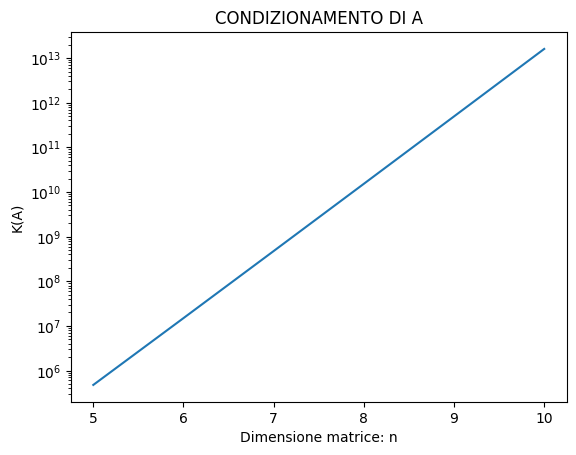

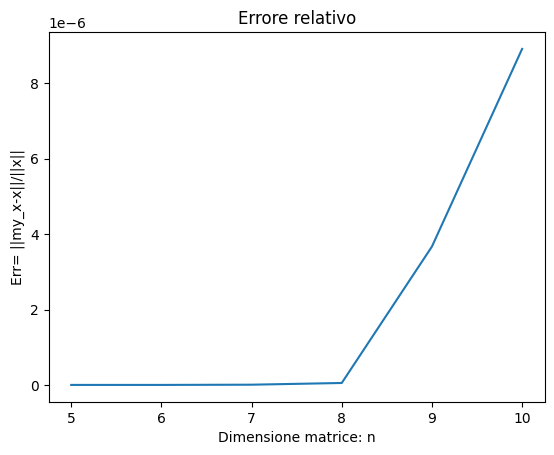

In [14]:
import matplotlib.pyplot as plt

K_A = np.zeros((6,1))
Err = np.zeros((6,1))

for n in np.arange(5,11):
    A = scipy.linalg.hilbert(n)
    x = np.ones((n,1))
    b = np.matmul(A,x)
    
    K_A[n-5] = np.linalg.cond(A)
    
    L = scipy.linalg.cholesky(A,lower=True)
    y = scipy.linalg.solve_triangular(L, b, lower=True, unit_diagonal=False)
    my_x = scipy.linalg.solve_triangular(np.transpose(L), y, lower=False)
    
    Err[n-5] = np.linalg.norm(x-my_x, "fro")/np.linalg.norm(x, "fro")
  
xplot = np.arange(5,11)

# grafico del numero di condizione vs dim
plt.semilogy(xplot,K_A)
plt.title("CONDIZIONAMENTO DI A")
plt.xlabel("Dimensione matrice: n")
plt.ylabel("K(A)")
plt.show()

plt.plot(xplot,Err)
plt.title("Errore relativo")
plt.xlabel("Dimensione matrice: n")
plt.ylabel("Err= ||my_x-x||/||x||")
plt.show()